In [2]:
#import the libraries
import tweepy
import codecs
from aylienapiclient import textapi
import csv, io
import matplotlib.pyplot as plt 
import pandas as pd
from collections import Counter
import csv 

In [3]:
#fill in your Twitter credentials 
access_token = ''
access_token_secret = ''
consumer_key = ''
consumer_secret = ''

#Set up an instance of the REST API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
#search query and store your results in a variable
search_results = api.search(q = "#brexit", lang = "en", result_type = "recent", count = 100)

file = codecs.open("brexit.txt", "w", "utf-8")
for result in search_results:
    file.write(result.text)
    file.write("\n")
file.close()

In [5]:
# Initialize a new client of AYLIEN Text API
client = textapi.Client("", "")

with io.open('brexit_tweet_SA.csv', 'w', encoding='utf8', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["Tweet", "Sentiment"])
    with io.open("brexit.txt", 'r', encoding='utf8') as f:
        for brex_tweet in f.readlines():
            ## Remove extra spaces or newlines around the text
            tweet = brex_tweet.strip()
            ## Reject tweets which are empty so you don’t waste your API credits
            if len(tweet) == 0:
                #print('skipped')
                continue
            ## Make call to AYLIEN Text API
            sentiment = client.Sentiment({'text': tweet})

            ## Write the sentiment result into csv file
            csv_writer.writerow([sentiment['text'], sentiment['polarity']])

HttpError: <HttpError 429 when requesting https://api.aylien.com/api/v1/sentiment returned "Too Many Requests">

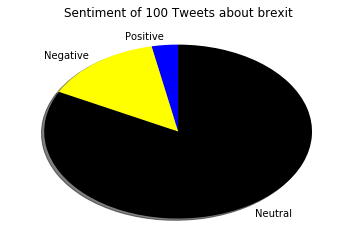

In [10]:
#open up your csv file with the sentiment results
with open('brexit_tweet_SA.csv', 'r', encoding = 'utf8') as brexcsvfile:
        # Pandas to read the “Sentiment” column,
        df_brex = pd.read_csv(brexcsvfile)
        sent_tweet = df_brex["Sentiment"]

#use Counter to count how many times each sentiment appears and save each as a variable
        counter_var = Counter(sent_tweet)
        positive = counter['positive']
        negative = counter['negative']
        neutral = counter['neutral']

## declare the variables for the pie chart, using the Counter variables for “sizes”
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive, negative, neutral]
colors = ['blue', 'yellow', 'black']
text = "brexit"

## use matplotlib to plot the chart
plt.pie(sizes, labels = labels, colors = colors, shadow = True, startangle = 90)
plt.title("Sentiment of 100 Tweets about "+ text)
plt.show()